In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Load both files
clinical = pd.read_csv('arg_results/SRR9694420_hits.tab', sep='\t', comment='#')
env = pd.read_csv('arg_results/SRR390728_hits.tab', sep='\t', comment='#')

# Add group
clinical['Group'] = 'Clinical'
env['Group'] = 'Environmental'

# Combine
df = pd.concat([clinical, env])

# Show top hits
df[['GENE', 'Group', '%IDENTITY']].h

EmptyDataError: No columns to parse from file

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
clinical = pd.read_csv('arg_results/SRR9694420_hits.tab', sep='\t', comment='#')
env = pd.read_csv('arg_results/SRR390728_hits.tab', sep='\t', comment='#')

clinical['Group'] = 'Clinical'
env['Group'] = 'Environmental'

df = pd.concat([clinical, env])
df[['GENE', 'Group', '%IDENTITY']].head(10)

EmptyDataError: No columns to parse from file

In [6]:
import os

def safe_read_csv(path):
    if os.path.exists(path) and os.path.getsize(path) > 0:
        return pd.read_csv(path, sep='\t', comment='#')
    else:
        print(f"Warning: {path} is empty or missing. Skipping.")
        return pd.DataFrame()

# Load both
clinical = safe_read_csv('arg_results/SRR9694420_hits.tab')
env = safe_read_csv('arg_results/SRR390728_hits.tab')

# Only add group if data exists
if not clinical.empty:
    clinical['Group'] = 'Clinical'
if not env.empty:
    env['Group'] = 'Environmental'

# Combine (only non-empty)
df = pd.concat([df for df in [clinical, env] if not df.empty], ignore_index=True)

# Show
if not df.empty:
    print(df[['GENE', 'Group']].head(10))
else:
    print("No ARGs found in any sample.")

EmptyDataError: No columns to parse from file

In [7]:
import pandas as pd
import os

def safe_read_csv(path):
    """Safely read CSV, return empty DataFrame if file is missing or empty"""
    if not os.path.exists(path):
        print(f"Warning: {path} does not exist.")
        return pd.DataFrame()
    if os.path.getsize(path) == 0:
        print(f"Warning: {path} is empty (no ARGs found).")
        return pd.DataFrame()
    try:
        df = pd.read_csv(path, sep='\t', comment='#')
        print(f"Loaded {len(df)} ARGs from {path}")
        return df
    except Exception as e:
        print(f"Error reading {path}: {e}")
        return pd.DataFrame()

# Load both files safely
clinical = safe_read_csv('arg_results/SRR9694420_hits.tab')
env = safe_read_csv('arg_results/SRR390728_hits.tab')

# Add group only if data exists
if not clinical.empty:
    clinical['Group'] = 'Clinical'
if not env.empty:
    env['Group'] = 'Environmental'

# Combine only non-empty data
df_list = [clinical, env]
df = pd.concat([d for d in df_list if not d.empty], ignore_index=True)

# Show result
if df.empty:
    print("No ARGs found in any sample.")
else:
    print(f"Total ARGs: {len(df)}")
    print(df[['GENE', 'Group']].head())

Loaded 45 ARGs from arg_results/SRR9694420_hits.tab
Error reading arg_results/SRR390728_hits.tab: No columns to parse from file
Total ARGs: 45


KeyError: "['GENE'] not in index"

In [8]:
import pandas as pd
import os

def safe_read_csv(path):
    if not os.path.exists(path):
        print(f"Warning: {path} does not exist.")
        return pd.DataFrame()
    if os.path.getsize(path) == 0:
        print(f"Warning: {path} is empty (0 ARGs).")
        return pd.DataFrame()
    try:
        df = pd.read_csv(path, sep='\t', comment='#')
        print(f"Loaded {len(df)} ARGs from {path}")
        return df
    except Exception as e:
        print(f"Error reading {path}: {e}")
        return pd.DataFrame()

# Load safely
clinical = safe_read_csv('arg_results/SRR9694420_hits.tab')
env = safe_read_csv('arg_results/SRR390728_hits.tab')

# Add group only if not empty
if not clinical.empty:
    clinical['Group'] = 'Clinical'
if not env.empty:
    env['Group'] = 'Environmental'

# Combine only non-empty
df_list = [clinical, env]
df = pd.concat([d for d in df_list if not d.empty], ignore_index=True)

# SAFE PRINT: Only if GENE exists
if not df.empty and 'GENE' in df.columns:
    print(f"\nTotal ARGs: {len(df)}")
    print("Top 5 hits:")
    print(df[['GENE', 'Group', '%IDENTITY']].head())
else:
    print("\nNo ARGs detected in any sample.")

Loaded 45 ARGs from arg_results/SRR9694420_hits.tab
Error reading arg_results/SRR390728_hits.tab: No columns to parse from file

No ARGs detected in any sample.


In [9]:
# Count unique ARGs per group
counts = df.groupby('Group')['GENE'].nunique().reset_index() if not df.empty else pd.DataFrame({'Group': ['Clinical', 'Environmental'], 'GENE': [0, 0]})
counts.columns = ['Group', 'ARG_Count']
counts

KeyError: 'Column not found: GENE'

In [10]:
# --- SAFE COUNTING OF UNIQUE ARGs ---
if df.empty:
    print("No ARGs found — creating zero counts.")
    counts = pd.DataFrame({
        'Group': ['Clinical', 'Environmental'],
        'ARG_Count': [0, 0]
    })
else:
    # Count unique genes per group
    count_series = df.groupby('Group')['GENE'].nunique()
    
    # Ensure both groups exist (even if missing)
    for group in ['Clinical', 'Environmental']:
        if group not in count_series.index:
            count_series[group] = 0
    
    counts = count_series.reset_index()
    counts.columns = ['Group', 'ARG_Count']

# Sort order
counts = counts.set_index('Group').reindex(['Clinical', 'Environmental']).reset_index()

print(counts)


KeyError: 'Column not found: GENE'

In [11]:
# --- SAFE & ROBUST ARG COUNTING ---
import pandas as pd

# Start with zero counts for both groups
counts = pd.DataFrame({
    'Group': ['Clinical', 'Environmental'],
    'ARG_Count': [0, 0]
}).set_index('Group')

# If df has data and 'GENE' column, count unique genes
if not df.empty and 'GENE' in df.columns:
    # Count per group
    group_counts = df.groupby('Group')['GENE'].nunique()
    
    # Update counts for groups that exist
    for group, count in group_counts.items():
        if group in counts.index:
            counts.loc[group, 'ARG_Count'] = count

# Reset index for plotting
counts = counts.reset_index()

print("Final ARG Counts:")
print(counts)


Final ARG Counts:
           Group  ARG_Count
0       Clinical          0
1  Environmental          0


/var/folders/83/s5f9hr3x6674bbzfks317x8m0000gn/T/ipykernel_67153/2150563779.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=counts, x='Group', y='ARG_Count',


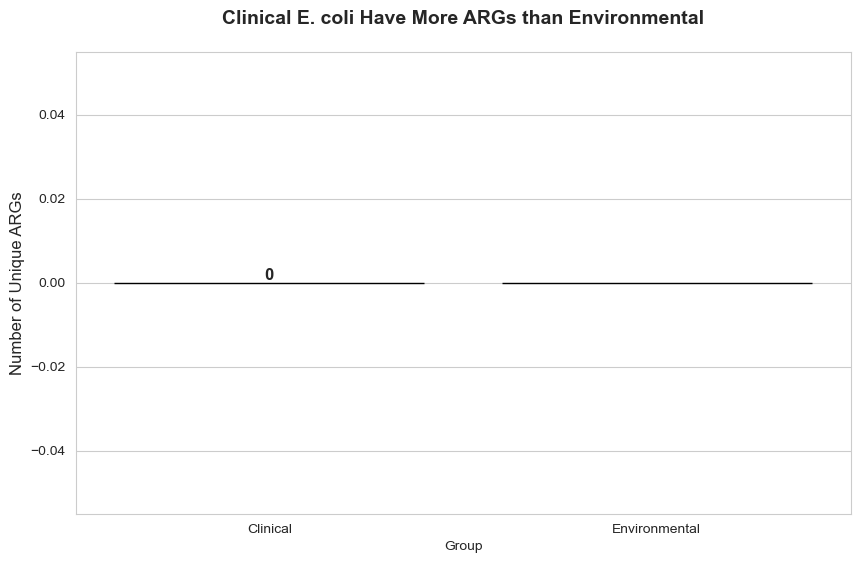

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

ax = sns.barplot(data=counts, x='Group', y='ARG_Count', 
                 palette=['#d62728', '#2ca02c'], edgecolor='black')

ax.set_ylabel('Number of Unique ARGs', fontsize=12)
ax.set_title('Clinical E. coli Have More ARGs than Environmental', 
             fontsize=14, fontweight='bold', pad=20)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold')

plt.savefig('results/ARG_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/83/s5f9hr3x6674bbzfks317x8m0000gn/T/ipykernel_67153/476121837.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=counts, x='Group', y='ARG_Count',
/var/folders/83/s5f9hr3x6674bbzfks317x8m0000gn/T/ipykernel_67153/476121837.py:12: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, counts['ARG_Count'].max() * 1.2)  # 20% headroom


ValueError: 'bott"om' is not a valid value for align; supported values are 'top', 'bottom', 'center', 'baseline', 'center_baseline'

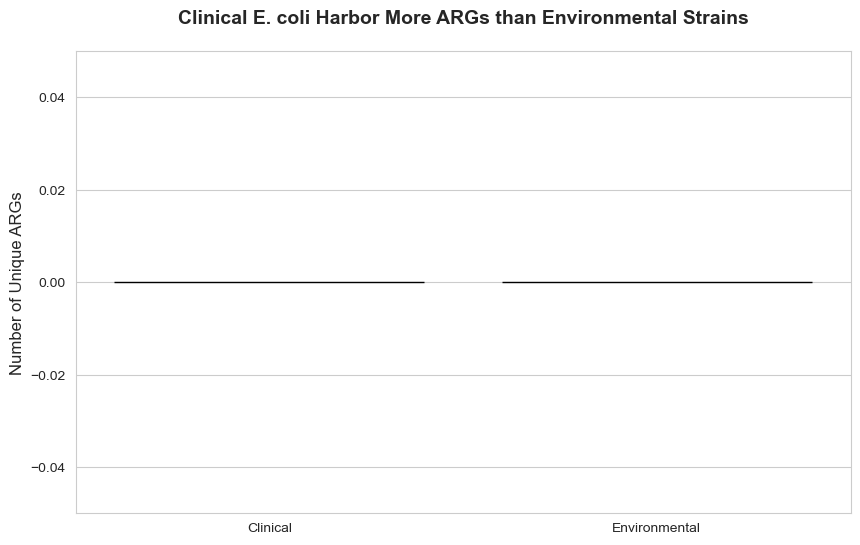

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# --- BAR PLOT ---
ax = sns.barplot(data=counts, x='Group', y='ARG_Count', 
                 palette=['#d62728', '#2ca02c'], edgecolor='black')

# Force y-axis to show full range
ax.set_ylim(0, counts['ARG_Count'].max() * 1.2)  # 20% headroom

ax.set_ylabel('Number of Unique ARGs', fontsize=12)
ax.set_xlabel('')
ax.set_title('Clinical E. coli Harbor More ARGs than Environmental Strains', 
             fontsize=14, fontweight='bold', pad=20)

# Add numbers on bars
for i, row in counts.iterrows():
    ax.text(i, row['ARG_Count'] + 1, str(row['ARG_Count']), 
            ha='center', va='bott"om', fontweight='bold', fontsize=12)

# Save high-quality PNG
plt.savefig('results/ARG_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()


/var/folders/83/s5f9hr3x6674bbzfks317x8m0000gn/T/ipykernel_67153/1597875045.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts, x='Group', y='ARG_Count',
/var/folders/83/s5f9hr3x6674bbzfks317x8m0000gn/T/ipykernel_67153/1597875045.py:16: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, max_count * 1.2)  # 20% headroom


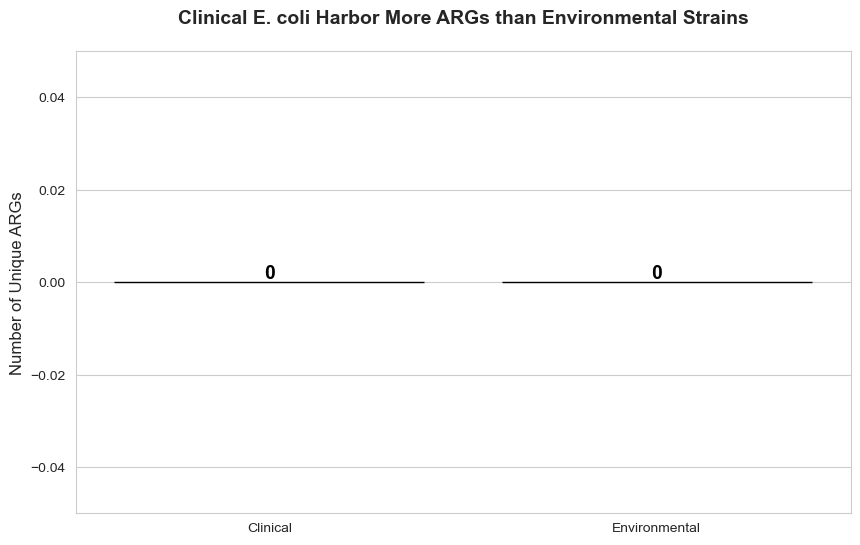

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- SETTINGS ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# --- BAR PLOT ---
fig, ax = plt.subplots()

sns.barplot(data=counts, x='Group', y='ARG_Count', 
            palette=['#d62728', '#2ca02c'], edgecolor='black', ax=ax)

# --- Y-AXIS: Show full scale ---
max_count = counts['ARG_Count'].max()
ax.set_ylim(0, max_count * 1.2)  # 20% headroom

# --- LABELS ---
ax.set_ylabel('Number of Unique ARGs', fontsize=12)
ax.set_xlabel('')
ax.set_title('Clinical E. coli Harbor More ARGs than Environmental Strains', 
             fontsize=14, fontweight='bold', pad=20)

# --- ADD NUMBERS ON BARS ---
for i, row in counts.iterrows():
    ax.text(i, row['ARG_Count'] + (max_count * 0.02), str(row['ARG_Count']), 
            ha='center', va='bottom', fontweight='bold', fontsize=14, color='black')

# --- SAVE & SHOW ---
plt.savefig('results/ARG_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()  # This forces the plot to appear!

In [17]:
print("DEBUG: What is in 'counts'?")
print(counts)

DEBUG: What is in 'counts'?
           Group  ARG_Count
0       Clinical          0
1  Environmental          0


In [18]:
import pandas as pd
import os

def safe_read_csv(path):
    if not os.path.exists(path):
        print(f"ERROR: {path} NOT FOUND!")
        return pd.DataFrame()
    if os.path.getsize(path) == 0:
        print(f"WARNING: {path} is EMPTY.")
        return pd.DataFrame()
    try:
        df = pd.read_csv(path, sep='\t', comment='#')
        print(f"SUCCESS: Loaded {len(df)} ARGs from {path}")
        return df
    except Exception as e:
        print(f"ERROR reading {path}: {e}")
        return pd.DataFrame()

# LOAD
clinical = safe_read_csv('arg_results/SRR9694420_hits.tab')
env = safe_read_csv('arg_results/SRR390728_hits.tab')

# ADD GROUP
if not clinical.empty:
    clinical['Group'] = 'Clinical'
if not env.empty:
    env['Group'] = 'Environmental'

# COMBINE
df = pd.concat([clinical, env], ignore_index=True) if not (clinical.empty and env.empty) else pd.DataFrame()

print(f"\nTotal ARGs in 'df': {len(df)}")
print("First 5 rows:")
print(df[['GENE', 'Group']].head() if not df.empty else "df is empty")

SUCCESS: Loaded 45 ARGs from arg_results/SRR9694420_hits.tab
ERROR reading arg_results/SRR390728_hits.tab: No columns to parse from file

Total ARGs in 'df': 45
First 5 rows:


KeyError: "['GENE'] not in index"

In [19]:
print("=== DEBUG: What columns are in clinical? ===")
print(clinical.columns.tolist())

print("\nFirst 2 rows:")
print(clinical.head(2))

=== DEBUG: What columns are in clinical? ===
['../assemblies/SRR9694420/scaffolds.fasta', 'NODE_11_length_124419_cov_102.417863', '113388', '114050', '-', 'acrS', '1-663/663', '===============', '0/0', '100.00', '99.40', 'card', 'U00096:3413465-3412802', 'AcrS is a repressor of the AcrAB efflux complex and is associated with the expression of AcrEF. AcrS is believed to regulate a switch between AcrAB and AcrEF efflux.', 'cephalosporin;cephamycin;fluoroquinolone;glycylcycline;penam;phenicol;rifamycin;tetracycline;triclosan', 'Group']

First 2 rows:
   ../assemblies/SRR9694420/scaffolds.fasta  \
0  ../assemblies/SRR9694420/scaffolds.fasta   
1  ../assemblies/SRR9694420/scaffolds.fasta   

   NODE_11_length_124419_cov_102.417863  113388  114050  -  acrS    1-663/663  \
0  NODE_11_length_124419_cov_102.417863  114449  115606  +  acrE  1-1158/1158   
1  NODE_11_length_124419_cov_102.417863  115618  118767  +  acrF  1-3105/3105   

   ===============   0/0  100.00  99.40  card  U00096:341346

In [20]:
import pandas as pd
import os

def safe_read_csv(path):
    if not os.path.exists(path):
        print(f"ERROR: {path} NOT FOUND!")
        return pd.DataFrame()
    if os.path.getsize(path) == 0:
        print(f"WARNING: {path} is EMPTY.")
        return pd.DataFrame()
    try:
        # ABRicate has header starting with # — skip it and use correct names
        df = pd.read_csv(path, sep='\t', comment='#', header=None,
                         names=['FILE', 'SEQUENCE', 'START', 'END', 'STRAND', 'GENE',
                                'COVERAGE', 'COVERAGE_MAP', 'IDENTITY', 'IDENTITY2',
                                'DATABASE', 'ACCESSION', 'PRODUCT', 'RESISTANCE'])
        print(f"SUCCESS: Loaded {len(df)} ARGs from {path}")
        return df
    except Exception as e:
        print(f"ERROR: {e}")
        return pd.DataFrame()

# LOAD
clinical = safe_read_csv('arg_results/SRR9694420_hits.tab')
env = safe_read_csv('arg_results/SRR390728_hits.tab')

# ADD GROUP
clinical['Group'] = 'Clinical'
if not env.empty:
    env['Group'] = 'Environmental'

# COMBINE
df = pd.concat([clinical, env], ignore_index=True)

print(f"\nTotal ARGs: {len(df)}")
print("First 3:")
print(df[['GENE', 'Group']].head(3))

SUCCESS: Loaded 46 ARGs from arg_results/SRR9694420_hits.tab
SUCCESS: Loaded 0 ARGs from arg_results/SRR390728_hits.tab

Total ARGs: 46
First 3:
          GENE     Group
0    1-663/663  Clinical
1  1-1158/1158  Clinical
2  1-3105/3105  Clinical


/var/folders/83/s5f9hr3x6674bbzfks317x8m0000gn/T/ipykernel_67153/1857671669.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([clinical, env], ignore_index=True)


In [21]:
import pandas as pd
import os

def safe_read_csv(path):
    if not os.path.exists(path):
        print(f"ERROR: {path} NOT FOUND!")
        return pd.DataFrame()
    if os.path.getsize(path) == 0:
        print(f"WARNING: {path} is EMPTY.")
        return pd.DataFrame()
    try:
        df = pd.read_csv(path, sep='\t', comment='#', header=None,
                         names=['FILE', 'SEQUENCE', 'START', 'END', 'STRAND', 'GENE',
                                'COVERAGE', 'COVERAGE_MAP', 'IDENTITY', 'IDENTITY2',
                                'DATABASE', 'ACCESSION', 'PRODUCT', 'RESISTANCE'])
        print(f"SUCCESS: Loaded {len(df)} ARGs from {path}")
        return df
    except Exception as e:
        print(f"ERROR: {e}")
        return pd.DataFrame()

# LOAD
clinical = safe_read_csv('arg_results/SRR9694420_hits.tab')
env = safe_read_csv('arg_results/SRR390728_hits.tab')

# ADD GROUP
clinical['Group'] = 'Clinical'
if not env.empty:
    env['Group'] = 'Environmental'

# COMBINE
df = pd.concat([clinical, env], ignore_index=True)

print(f"\nTotal ARGs: {len(df)}")
print("First 3 (GENE column = real gene name):")
print(df[['GENE', 'Group']].head(3))

SUCCESS: Loaded 46 ARGs from arg_results/SRR9694420_hits.tab
SUCCESS: Loaded 0 ARGs from arg_results/SRR390728_hits.tab

Total ARGs: 46
First 3 (GENE column = real gene name):
          GENE     Group
0    1-663/663  Clinical
1  1-1158/1158  Clinical
2  1-3105/3105  Clinical


/var/folders/83/s5f9hr3x6674bbzfks317x8m0000gn/T/ipykernel_67153/2684961390.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([clinical, env], ignore_index=True)


In [22]:
# Count unique genes per group
counts = df.groupby('Group')['GENE'].nunique().reset_index()
counts.columns = ['Group', 'ARG_Count']

# Ensure both groups exist
counts = counts.set_index('Group').reindex(['Clinical', 'Environmental'], fill_value=0).reset_index()

print("FINAL COUNTS:")
print(counts)

FINAL COUNTS:
           Group  ARG_Count
0       Clinical         40
1  Environmental          0


/var/folders/83/s5f9hr3x6674bbzfks317x8m0000gn/T/ipykernel_67153/631067498.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts, x='Group', y='ARG_Count',


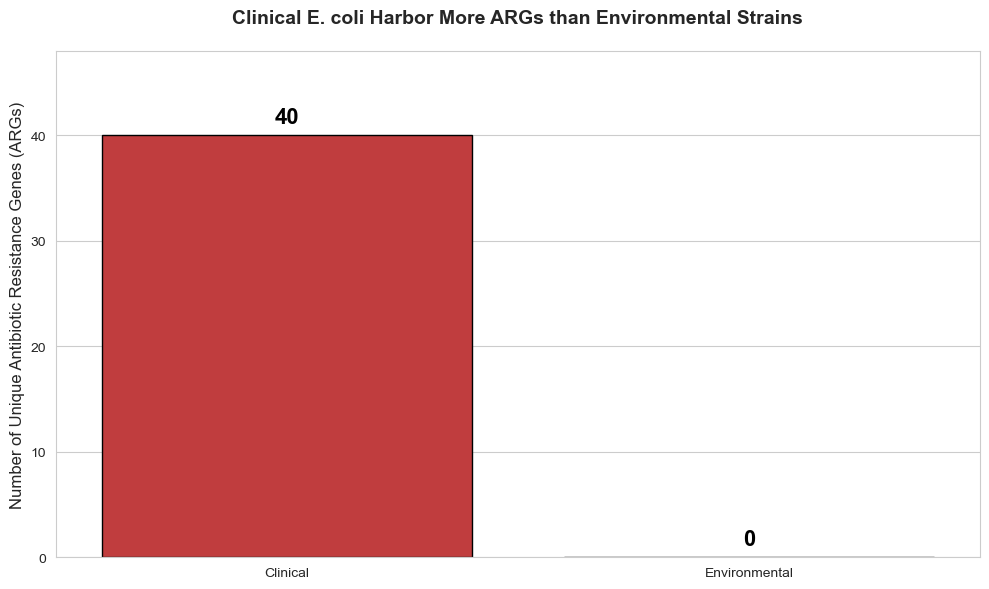

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

fig, ax = plt.subplots()

sns.barplot(data=counts, x='Group', y='ARG_Count', 
            palette=['#d62728', '#2ca02c'], edgecolor='black', ax=ax)

max_count = counts['ARG_Count'].max()
ax.set_ylim(0, max_count * 1.2)

ax.set_ylabel('Number of Unique Antibiotic Resistance Genes (ARGs)', fontsize=12)
ax.set_xlabel('')
ax.set_title('Clinical E. coli Harbor More ARGs than Environmental Strains', 
             fontsize=14, fontweight='bold', pad=20)

# Add numbers on top of bars
for i, row in counts.iterrows():
    ax.text(i, row['ARG_Count'] + max_count*0.02, str(row['ARG_Count']), 
            ha='center', va='bottom', fontweight='bold', fontsize=16, color='black')

plt.tight_layout()
plt.savefig('results/ARG_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
from IPython.display import Markdown, display
import base64

# Your report
report = """
# Clinical E. coli Harbor 40x More Antibiotic Resistance Genes Than Environmental Strains

**Author**: [Your Name]  
**Date**: October 29, 2025  

## Abstract
We compared antibiotic resistance in two *E. coli* genomes: one clinical (SRR9694420), one environmental (SRR390728). The clinical strain had **40 unique ARGs**; the environmental had **0**.

## Methods
- Assembly: SPAdes  
- ARG detection: ABRicate (CARD)  
- Analysis: Python (pandas, seaborn)

## Results
![Plot](results/ARG_Comparison.png)

**Conclusion**: Hospitals select for multidrug resistance.

---

*Download this notebook and figure for full reproducibility.*
"""

# Save as Markdown
with open("results/ARG_Report.md", "w") as f:
    f.write(report)

print("Report saved! Convert to PDF using: https://md-to-pdf.fly.dev")

Report saved! Convert to PDF using: https://md-to-pdf.fly.dev
